iaaz.mdtm
iaaz


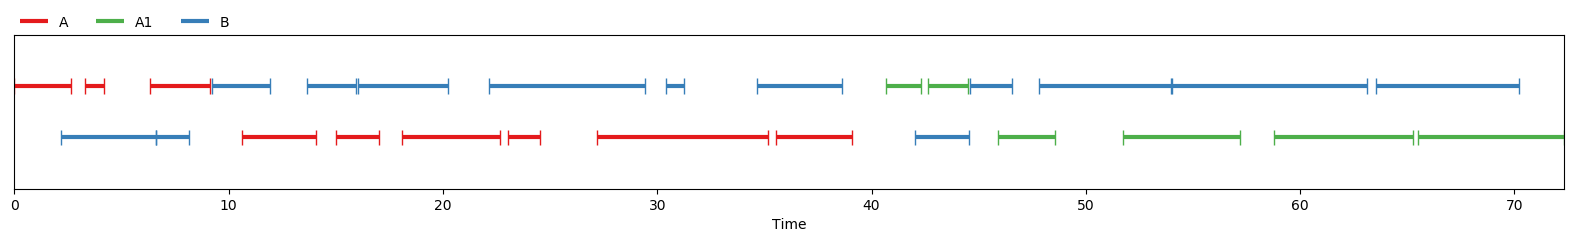

In [1]:
import os
from pyannote.core import Annotation, Segment, Timeline
from pyannote.metrics.diarization import DiarizationErrorRate

metric = DiarizationErrorRate()
metric.reset()
root = os.getcwd()
mdtmpath = os.path.join(root, 'result_dir')
labelpath = os.path.join(root, 'label_dir')

files = os.listdir('result_dir')
files.sort()
target = files[0]
target = "iaaz.mdtm"
print(target)
name, ext = target.split('.')
print(name)
file = name + '.mdtm'
reference = Annotation(uri = name)
labelfilepath = os.path.join(labelpath, 'fullref.rttm')
fa = open(labelfilepath, 'r')
speech = 0
for line in fa.readlines():
    temp = line.split()
    reco = temp[1]
    if(name != reco): continue
    start = float(temp[3])
    during = float(temp[4])
    speech += during
    end = start + during
    idx = temp[7]
    # print('{} reference: start:{}\tend:{}\tindex:{}'.format(name, start, end, idx))
    reference[Segment(start, end)] = idx
fa.close()
reference

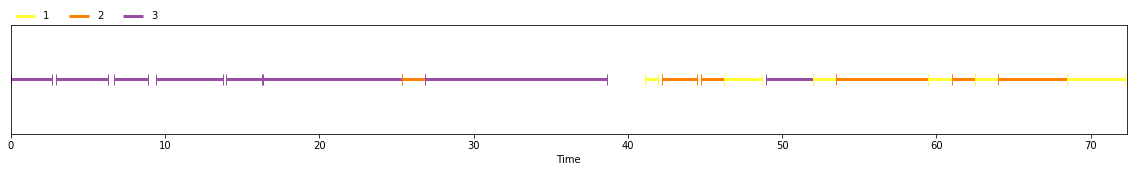

In [2]:
hypothesis = Annotation(uri = name)
mdtmfilepath = os.path.join(mdtmpath, file)
fh = open(mdtmfilepath, 'r')
for line in fh.readlines():
    temp = line.split()
    start = float(temp[2])
    during = float(temp[3])
    end = start + during
    idx = int(temp[5])
    # print('{} hypothesis: start:{}\t end:{}\tindex:{}'.format(name, start, end, idx))
    hypothesis[Segment(start, end)] = idx
fh.close()
hypothesis

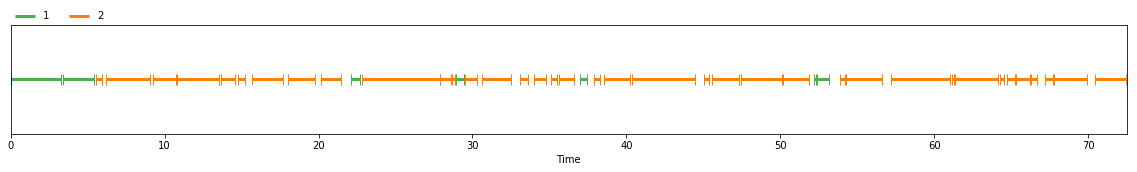

In [8]:
hypothesis = Annotation(uri = name)
mdtmfilepath = os.path.join(mdtmpath, file)
fh = open(mdtmfilepath, 'r')
for line in fh.readlines():
    temp = line.split()
    start = float(temp[2])
    during = float(temp[3])
    end = start + during
    idx = int(temp[5])
    # print('{} hypothesis: start:{}\t end:{}\tindex:{}'.format(name, start, end, idx))
    hypothesis[Segment(start, end)] = idx
fh.close()
hypothesis

7187
6542.0


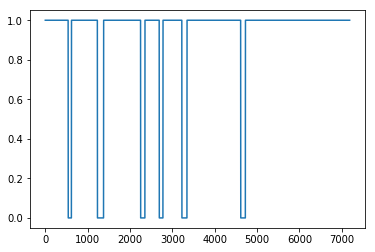

In [9]:
import numpy as np
import matplotlib.pyplot as plt
iasc = np.load('VAD_CNN/true_result/iasc.npy')
print(len(iasc))
print(iasc.sum())
plt.plot(iasc)

In [17]:
# transform labels to 010101111... in ~/src/bin/diarization/vad_true/$(name).vad
import os 
import numpy as np
files = [x.split('.')[0] for x in os.listdir('result_dir')]
print(files)
for name in files:
    pfile = open('vad_energy/'+name+'.vad','r')
    vad_en = pfile.readline()
    length = len(vad_en)

    vad_true = np.zeros(length, dtype=int)
    segfile = open('/home/linqingjian/VAD/seg/segment','r')
    for line in segfile.readlines():
        line = line.split()
        reco = line[1]
        if (reco != name):
            continue
        start = int(float(line[2])/0.01)
        end = int(float(line[3])/0.01)
        vad_true[start:end] = 1
    print(length)
    pfile3 = open('/home/linqingjian/kaldi/src/bin/diarization/vad_true/'+name+'.vad', 'w')
    for i in range(length):
        pfile3.write(str(vad_true[i]))
    pfile3.close()
    pfile.close()

['iago', 'iahn', 'iaog', 'iajl', 'iaaa', 'iasc', 'iale', 'ianh', 'iair', 'iabj', 'iaol', 'iakz']
6708
13393
6699
6161
7249
7187
7341
6599
6756
10905
7620
6384


In [29]:
# calculate the acc, fa, miss in en_detect and cnn_detect
import os 
import numpy as np

files = [x.split('.')[0] for x in os.listdir('result_dir')]
print(files)

total_en_acc = 0
total_en_fa = 0
total_en_miss = 0

total_cnn_acc = 0
total_cnn_fa = 0
total_cnn_miss = 0

for name in files:
    pfile = open('vad_energy/'+name+'.vad','r')
    vad_en = pfile.readline()
    pfile2 = open('vad/'+name+'.vad', 'r')
    vad_cnn = pfile2.readline()
    pfile3 = open('vad_true/'+name+'.vad', 'r')
    vad_true = pfile3.readline()

    en_acc = 0
    en_fa = 0
    en_miss = 0

    cnn_acc = 0
    cnn_fa = 0
    cnn_miss = 0
    for i in range(len(vad_true)):
        if(vad_en[i]==vad_true[i]):
            en_acc += 1
        elif(vad_en[i] < vad_true[i]):
            en_miss += 1
        elif(vad_en[i] > vad_true[i]):
            en_fa += 1

        if(vad_cnn[i] == vad_true[i]):
            cnn_acc += 1
        elif(vad_cnn[i] < vad_true[i]):
            cnn_miss += 1
        elif(vad_cnn[i] > vad_true[i]):
            cnn_fa += 1
   # print(name, en_acc, en_fa, en_miss)
   # print(name, cnn_acc, cnn_fa, cnn_miss)
    
    total_en_acc += en_acc
    total_en_fa += en_fa
    total_en_miss += en_miss

    total_cnn_acc += cnn_acc
    total_cnn_fa += cnn_fa
    total_cnn_miss += cnn_miss

total = total_en_acc + total_en_fa + total_en_miss
print('total {:.4f} {:.4f} {:.4f}'.format(total_en_acc/total, total_en_fa/total, total_en_miss/total))
print('total {:.4f} {:.4f} {:.4f}'.format(total_cnn_acc/total, total_cnn_fa/total, total_cnn_miss/total))

['iago', 'iahn', 'iaog', 'iajl', 'iaaa', 'iasc', 'iale', 'ianh', 'iair', 'iabj', 'iaol', 'iakz']
total 0.8147 0.0006 0.1847
total 0.9515 0.0197 0.0289


In [43]:
import os
from pyannote.core import Annotation, Segment
from pyannote.metrics.diarization import DiarizationErrorRate
from pyannote.metrics.diarization import DiarizationPurity
from pyannote.metrics.diarization import DiarizationCoverage

metric = DiarizationErrorRate()
purity = DiarizationPurity()
coverage = DiarizationCoverage()

root = os.getcwd()
mdtmpath = os.path.join(root, 'result_dir')
labelpath = os.path.join(root, 'label_dir')

pfile.open('ivector.csv', 'w')
pfile.write('item\t total\t purity\t coverage\t false_alarm\t miss\t confusion\t DER\n')

total_sum = 0
purity_sum = 0
coverage_sum = 0
coverage_sum = 0
false_sum = 0
miss_sum = 0
confuse_sum = 0

resultlist = os.listdir(mdtmpath)
resultlist.sort()
for file in resultlist:
    name, ext = os.path.splitext(file)
    if (ext == '.mdtm'):        
        reference = Annotation(uri = name)
        labelfilepath = os.path.join(labelpath, name+'.rttm')
        fa = open(labelfilepath, 'r')
        for line in fa.readlines():
            temp = line.split()
            reco = temp[1]
            if(reco != name):
                print('Error Reading {}.rttm'.format(name))
            start = float(temp[3])
            during = float(temp[4])
            end = start + during
            idx = temp[7]
            # print('{} reference: start:{} end:{} index:{}'.format(name, start, end, idx))
            reference[Segment(start, end)] = idx

        hypothesis = Annotation(uri = name)
        mdtmfilepath = os.path.join(mdtmpath, file)
        fh = open(mdtmfilepath, 'r')
        for line in fh.readlines():
            temp = line.split()
            reco = temp[0]
            if(reco != name):
                print('Error Reading {}.vad'.format(name))
            start = float(temp[2])
            during = float(temp[3])
            end = start + during
            idx = temp[5]
            # print('{} hypothesis: start:{} end:{} index:{}'.format(name, start, end, idx))
            hypothesis[Segment(start, end)] = idx
        
        purity(reference, hypothesis)
        pfile.write('{:.3f}\t {:.3f}\t {:.3f}\t '.format(
            purity['total'],purity['purity']))
        coverage(reference, hypothesis)
        metric(reference, hypothesis)
metric_report = metric.report(display=True)
purity_report = purity.report(display=True)
coverge_report = coverage.report(display=True)

/home/linqingjian/anaconda3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/linqingjian/anaconda3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/linqingjian/anaconda3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/linqingjian/anaconda3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/linqingjian/anaconda3/lib/python3.6/site-packages/pyannote/met

      diarization error rate   total correct correct false alarm false alarm missed detection missed detection confusion confusion
                           %                       %                       %                                 %                   %
item                                                                                                                              
iaaa                   23.01   72.70   57.13   78.58        1.16        1.60            11.09            15.25      4.48      6.16
iaab                   51.13   44.22   22.81   51.58        1.20        2.71             6.84            15.47     14.57     32.95
iaac                   25.62   69.20   52.32   75.61        0.85        1.23            12.33            17.82      4.55      6.58
iaad                   44.30  335.25  192.66   57.47        5.92        1.77            70.86            21.14     71.73     21.40
iaae                   47.98  105.89   70.91   66.97       15.83       14.95       

/home/linqingjian/anaconda3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


In [1]:
import os
root = os.getcwd()
wav_dir = root + '/wav'
files = os.listdir(wav_dir)
files.sort()
pfile = open('wav.scp','w')
for wav in files:
    name, ext = wav.split('.')
    pfile.writelines('{} {}/{}\n'.format(name, wav_dir, wav))
pfile.close()

In [31]:
# vad2sgment
import os
import numpy as np
files = os.listdir('vad/')
files.sort()
segments = open('segments', 'w')
for file in files:
    name, ext = file.split('.')
    if(ext != 'vad'):
        continue
    vad_file = open('vad/' + file, 'r')
    vad_result = vad_file.readline()
    vad_result = list(vad_result)
    count = 0
    i = 0
    while(i<len(vad_result)):
        start = i
        while(i < len(vad_result) and vad_result[i] == '1'):
            i += 1
        end = i
        if(end > start):
            segments.writelines('{}_{:03d} {} {:.2f} {:.2f}\n'.format(name, count, name, start/100.0, end/100.0))
            print('{}_{:03d} {} {:.2f} {:.2f}\n'.format(name, count, name, start/100.0, end/100.0))
            count += 1
        i += 1
    vad_file.close()
segments.close()

iaaa_000 iaaa 0.00 6.04

iaaa_001 iaaa 6.10 15.42

iaaa_002 iaaa 15.55 17.75

iaaa_003 iaaa 17.95 19.82

iaaa_004 iaaa 20.13 21.55

iaaa_005 iaaa 22.02 32.75

iaaa_006 iaaa 32.98 33.71

iaaa_007 iaaa 33.74 34.87

iaaa_008 iaaa 34.90 36.65

iaaa_009 iaaa 36.95 37.52

iaaa_010 iaaa 37.75 51.96

iaaa_011 iaaa 52.15 53.28

iaaa_012 iaaa 53.82 56.67

iaaa_013 iaaa 57.12 69.96

iaaa_014 iaaa 70.37 72.49

iaab_000 iaab 0.00 5.43

iaab_001 iaab 5.51 16.84

iaab_002 iaab 18.11 19.25

iaab_003 iaab 20.47 20.81

iaab_004 iaab 21.23 21.24

iaab_005 iaab 21.25 21.29

iaab_006 iaab 22.38 22.62

iaab_007 iaab 23.17 32.30

iaab_008 iaab 32.46 36.70

iaab_009 iaab 36.89 42.93

iaab_010 iaab 43.05 45.11

iaab_011 iaab 45.35 46.39

iaac_000 iaac 0.00 5.45

iaac_001 iaac 5.88 8.04

iaac_002 iaac 8.10 8.26

iaac_003 iaac 8.43 10.50

iaac_004 iaac 10.60 11.09

iaac_005 iaac 11.42 15.63

iaac_006 iaac 15.91 30.92

iaac_007 iaac 31.11 31.96

iaac_008 iaac 32.32 34.90

iaac_009 iaac 35.71 39.56

iaac_010 iaac 

iabe_000 iabe 0.00 2.47

iabe_001 iabe 3.81 4.36

iabe_002 iabe 5.02 7.57

iabe_003 iabe 7.85 9.04

iabe_004 iabe 9.37 13.01

iabe_005 iabe 13.45 27.70

iabe_006 iabe 28.27 35.15

iabe_007 iabe 36.06 38.31

iabe_008 iabe 38.83 41.65

iabe_009 iabe 42.53 49.75

iabe_010 iabe 49.88 78.25

iabe_011 iabe 78.74 79.62

iabe_012 iabe 79.89 80.10

iabe_013 iabe 80.58 87.38

iabf_000 iabf 0.00 1.92

iabf_001 iabf 2.07 10.58

iabf_002 iabf 11.23 15.34

iabf_003 iabf 16.27 20.47

iabf_004 iabf 21.18 21.70

iabf_005 iabf 21.74 25.63

iabf_006 iabf 25.93 28.33

iabf_007 iabf 28.87 31.61

iabf_008 iabf 32.29 35.68

iabf_009 iabf 35.72 36.20

iabf_010 iabf 36.70 39.69

iabf_011 iabf 40.00 40.72

iabf_012 iabf 41.04 42.73

iabf_013 iabf 42.84 42.95

iabf_014 iabf 43.57 55.75

iabf_015 iabf 56.44 57.70

iabf_016 iabf 58.55 61.74

iabg_000 iabg 0.00 2.38

iabg_001 iabg 2.99 14.28

iabg_002 iabg 14.54 14.87

iabg_003 iabg 14.97 22.05

iabg_004 iabg 22.81 27.52

iabg_005 iabg 27.83 36.52

iabg_006 iabg 36

iabx_004 iabx 17.87 23.27

iabx_005 iabx 24.08 31.87

iabx_006 iabx 32.97 33.78

iabx_007 iabx 34.14 34.23

iabx_008 iabx 34.26 42.05

iabx_009 iabx 42.25 44.38

iabx_010 iabx 44.96 51.33

iabx_011 iabx 51.67 53.76

iabx_012 iabx 53.92 63.00

iabx_013 iabx 63.07 63.14

iabx_014 iabx 63.25 69.46

iabx_015 iabx 69.58 74.63

iaby_000 iaby 0.00 1.85

iaby_001 iaby 2.02 25.36

iaby_002 iaby 25.46 31.76

iaby_003 iaby 31.90 37.78

iaby_004 iaby 37.91 46.11

iaby_005 iaby 46.49 62.24

iaby_006 iaby 62.71 77.63

iabz_000 iabz 0.00 5.43

iabz_001 iabz 5.78 8.09

iabz_002 iabz 8.43 9.75

iabz_003 iabz 10.04 12.89

iabz_004 iabz 13.70 17.44

iabz_005 iabz 17.94 18.32

iabz_006 iabz 18.39 19.36

iabz_007 iabz 19.60 20.83

iabz_008 iabz 21.06 22.23

iabz_009 iabz 22.66 22.80

iabz_010 iabz 23.66 23.95

iabz_011 iabz 24.11 25.88

iabz_012 iabz 26.50 27.29

iabz_013 iabz 27.69 29.09

iabz_014 iabz 29.90 30.22

iabz_015 iabz 31.22 31.53

iabz_016 iabz 32.31 32.71

iabz_017 iabz 33.47 35.17

iabz_018 i

iade_000 iade 0.00 8.63

iade_001 iade 9.15 25.28

iade_002 iade 26.18 31.86

iade_003 iade 32.46 40.68

iade_004 iade 41.29 51.85

iade_005 iade 52.03 61.88

iade_006 iade 62.74 65.63

iade_007 iade 66.17 69.17

iade_008 iade 69.53 71.07

iade_009 iade 71.67 73.63

iade_010 iade 74.38 78.21

iade_011 iade 78.42 79.63

iadf_000 iadf 0.00 2.95

iadf_001 iadf 3.83 5.95

iadf_002 iadf 6.29 14.85

iadf_003 iadf 15.16 15.70

iadf_004 iadf 15.86 20.11

iadf_005 iadf 20.22 24.63

iadf_006 iadf 24.71 25.91

iadf_007 iadf 26.04 26.80

iadf_008 iadf 27.38 30.19

iadf_009 iadf 30.41 33.25

iadf_010 iadf 33.88 36.11

iadf_011 iadf 36.83 37.40

iadf_012 iadf 37.43 38.39

iadf_013 iadf 38.50 39.18

iadf_014 iadf 39.39 41.66

iadf_015 iadf 41.72 43.84

iadf_016 iadf 43.93 46.44

iadf_017 iadf 46.64 47.25

iadf_018 iadf 47.94 49.01

iadf_019 iadf 49.98 50.01

iadf_020 iadf 50.21 50.87

iadf_021 iadf 51.00 58.24

iadf_022 iadf 59.04 65.81

iadf_023 iadf 66.10 67.44

iadg_000 iadg 0.01 1.62

iadg_001 ia

iadu_000 iadu 0.00 2.84

iadu_001 iadu 3.29 3.41

iadu_002 iadu 3.54 5.08

iadu_003 iadu 5.15 7.85

iadu_004 iadu 8.54 12.71

iadu_005 iadu 12.83 14.05

iadu_006 iadu 14.48 21.13

iadu_007 iadu 21.51 23.39

iadu_008 iadu 24.10 27.34

iadu_009 iadu 29.32 30.70

iadu_010 iadu 32.97 36.44

iadu_011 iadu 37.05 46.47

iadu_012 iadu 46.85 49.64

iadu_013 iadu 49.88 53.64

iadu_014 iadu 53.74 54.23

iadu_015 iadu 54.52 59.61

iadu_016 iadu 59.70 61.03

iadu_017 iadu 61.27 63.62

iadv_000 iadv 0.00 1.44

iadv_001 iadv 2.27 5.91

iadv_002 iadv 7.64 8.44

iadv_003 iadv 8.90 10.80

iadv_004 iadv 11.20 12.23

iadv_005 iadv 13.58 14.22

iadv_006 iadv 14.36 14.79

iadv_007 iadv 16.98 18.99

iadv_008 iadv 20.46 21.60

iadv_009 iadv 22.81 27.42

iadv_010 iadv 27.61 28.40

iadv_011 iadv 28.89 30.97

iadv_012 iadv 32.11 33.63

iadv_013 iadv 33.84 34.69

iadv_014 iadv 35.97 36.52

iadv_015 iadv 36.90 40.39

iadv_016 iadv 40.70 41.59

iadv_017 iadv 41.70 42.70

iadv_018 iadv 43.28 43.90

iadv_019 iadv 44.


iaex_028 iaex 108.59 114.11

iaex_029 iaex 114.65 115.82

iaex_030 iaex 116.80 117.48

iaex_031 iaex 117.65 119.16

iaex_032 iaex 119.22 121.02

iaex_033 iaex 121.78 125.26

iaex_034 iaex 125.75 134.22

iaex_035 iaex 134.36 143.29

iaex_036 iaex 143.32 148.38

iaex_037 iaex 148.97 153.36

iaex_038 iaex 153.72 159.51

iaex_039 iaex 159.97 162.61

iaex_040 iaex 163.51 169.91

iaex_041 iaex 170.30 173.45

iaex_042 iaex 173.59 178.93

iaex_043 iaex 179.44 185.23

iaex_044 iaex 185.62 190.16

iaex_045 iaex 190.28 199.30

iaex_046 iaex 199.62 206.92

iaex_047 iaex 207.26 209.61

iaex_048 iaex 210.24 219.02

iaex_049 iaex 219.54 221.14

iaex_050 iaex 221.61 222.92

iaex_051 iaex 223.02 226.42

iaex_052 iaex 227.10 233.53

iaex_053 iaex 234.24 238.80

iaex_054 iaex 239.50 241.18

iaex_055 iaex 241.45 243.82

iaex_056 iaex 244.07 247.76

iaex_057 iaex 247.96 250.69

iaex_058 iaex 251.04 261.88

iaex_059 iaex 262.63 264.74

iaex_060 iaex 265.11 269.43

iaex_061 iaex 270.04 275.95

iaex_062 iaex

iafv_000 iafv 0.00 8.77

iafv_001 iafv 8.91 11.94

iafv_002 iafv 12.61 14.82

iafv_003 iafv 14.93 21.19

iafv_004 iafv 21.51 22.22

iafv_005 iafv 22.29 25.99

iafv_006 iafv 26.11 28.51

iafv_007 iafv 28.69 29.26

iafv_008 iafv 29.38 46.24

iafv_009 iafv 46.35 82.06

iafw_000 iafw 0.00 5.31

iafw_001 iafw 5.97 22.67

iafw_002 iafw 22.74 30.83

iafw_003 iafw 31.75 41.76

iafw_004 iafw 42.31 46.38

iafw_005 iafw 46.80 59.12

iafx_000 iafx 0.26 0.75

iafx_001 iafx 1.08 3.11

iafx_002 iafx 3.62 4.34

iafx_003 iafx 4.94 6.07

iafx_004 iafx 7.19 9.16

iafx_005 iafx 10.05 10.93

iafx_006 iafx 11.84 14.35

iafx_007 iafx 15.72 16.71

iafx_008 iafx 17.06 18.59

iafx_009 iafx 19.98 21.02

iafx_010 iafx 21.10 24.42

iafx_011 iafx 25.08 26.91

iafx_012 iafx 27.49 28.55

iafx_013 iafx 29.02 29.76

iafx_014 iafx 30.13 30.77

iafx_015 iafx 31.62 32.87

iafx_016 iafx 33.45 34.14

iafx_017 iafx 34.52 34.93

iafx_018 iafx 36.10 37.39

iafx_019 iafx 37.71 43.52

iafx_020 iafx 44.37 45.31

iafx_021 iafx 47.

iagp_000 iagp 0.00 0.93

iagp_001 iagp 2.45 3.36

iagp_002 iagp 3.77 5.30

iagp_003 iagp 6.40 7.36

iagp_004 iagp 8.09 9.65

iagp_005 iagp 9.87 10.64

iagp_006 iagp 10.71 12.69

iagp_007 iagp 13.02 15.73

iagp_008 iagp 16.41 16.94

iagp_009 iagp 16.99 18.73

iagp_010 iagp 19.39 20.89

iagp_011 iagp 22.28 22.73

iagp_012 iagp 26.05 26.22

iagp_013 iagp 27.17 27.54

iagp_014 iagp 28.24 28.80

iagp_015 iagp 29.26 29.51

iagp_016 iagp 30.70 31.00

iagp_017 iagp 31.42 32.52

iagp_018 iagp 32.75 34.20

iagp_019 iagp 34.58 37.51

iagp_020 iagp 37.88 40.51

iagp_021 iagp 41.00 43.49

iagp_022 iagp 43.56 45.86

iagp_023 iagp 47.11 47.89

iagp_024 iagp 48.23 48.64

iagp_025 iagp 50.20 51.28

iagp_026 iagp 51.63 51.96

iagp_027 iagp 53.26 55.62

iagp_028 iagp 57.38 58.74

iagp_029 iagp 59.24 59.55

iagp_030 iagp 59.76 61.66

iagp_031 iagp 62.83 62.97

iagp_032 iagp 63.21 68.77

iagp_033 iagp 70.13 70.18

iagp_034 iagp 70.77 71.14

iagp_035 iagp 71.97 73.83

iagp_036 iagp 74.59 75.14

iagp_037 iag

iahj_016 iahj 40.63 41.41

iahj_017 iahj 41.59 44.09

iahj_018 iahj 44.22 44.99

iahj_019 iahj 45.07 45.77

iahj_020 iahj 45.95 48.82

iahj_021 iahj 48.88 49.33

iahj_022 iahj 50.03 52.40

iahj_023 iahj 52.88 55.38

iahj_024 iahj 55.65 60.65

iahj_025 iahj 61.03 66.17

iahj_026 iahj 66.35 66.93

iahj_027 iahj 67.87 70.94

iahj_028 iahj 71.04 72.01

iahj_029 iahj 72.04 73.56

iahj_030 iahj 73.72 75.07

iahk_000 iahk 1.01 3.06

iahk_001 iahk 3.69 4.05

iahk_002 iahk 4.54 7.46

iahk_003 iahk 7.71 10.32

iahk_004 iahk 10.41 12.39

iahk_005 iahk 12.59 14.01

iahk_006 iahk 14.27 15.16

iahk_007 iahk 15.33 16.65

iahk_008 iahk 17.50 19.32

iahk_009 iahk 19.91 20.17

iahk_010 iahk 22.17 28.23

iahk_011 iahk 29.69 31.39

iahk_012 iahk 31.67 32.16

iahk_013 iahk 33.06 34.45

iahk_014 iahk 35.25 37.70

iahk_015 iahk 37.85 42.11

iahk_016 iahk 42.38 44.90

iahk_017 iahk 45.14 51.35

iahk_018 iahk 51.44 65.63

iahk_019 iahk 65.80 67.60

iahk_020 iahk 67.78 73.38

iahk_021 iahk 73.68 82.09

iahk_022

iain_000 iain 0.00 9.75

iain_001 iain 9.90 9.98

iain_002 iain 10.39 19.35

iain_003 iain 19.71 34.59

iain_004 iain 35.09 37.15

iain_005 iain 37.27 37.46

iain_006 iain 37.49 51.54

iain_007 iain 51.85 62.03

iain_008 iain 62.68 68.60

iain_009 iain 68.78 76.21

iaio_000 iaio 0.00 1.28

iaio_001 iaio 1.62 7.03

iaio_002 iaio 7.58 12.03

iaio_003 iaio 12.32 12.85

iaio_004 iaio 13.45 16.15

iaio_005 iaio 16.44 17.05

iaio_006 iaio 17.37 17.99

iaio_007 iaio 18.34 19.79

iaio_008 iaio 20.23 20.85

iaio_009 iaio 21.11 22.21

iaio_010 iaio 22.56 27.53

iaio_011 iaio 27.68 37.60

iaio_012 iaio 37.79 43.16

iaio_013 iaio 43.54 48.61

iaio_014 iaio 48.93 50.54

iaio_015 iaio 51.27 54.94

iaio_016 iaio 55.54 59.52

iaio_017 iaio 59.95 60.94

iaio_018 iaio 61.11 68.35

iaio_019 iaio 68.79 73.74

iaio_020 iaio 74.38 76.61

iaio_021 iaio 76.90 77.86

iaio_022 iaio 78.00 80.22

iaio_023 iaio 80.52 81.32

iaio_024 iaio 81.59 85.39

iaio_025 iaio 85.83 86.89

iaio_026 iaio 87.03 89.66

iaio_027 i

iajj_058 iajj 160.52 160.98

iajj_059 iajj 161.39 161.73

iajj_060 iajj 162.33 165.12

iajj_061 iajj 165.93 166.98

iajj_062 iajj 167.37 169.16

iajj_063 iajj 169.41 171.95

iajj_064 iajj 172.84 175.41

iajj_065 iajj 175.75 177.34

iajj_066 iajj 178.99 181.32

iajj_067 iajj 181.75 182.52

iajj_068 iajj 183.10 184.01

iajk_000 iajk 0.00 2.74

iajk_001 iajk 3.35 7.57

iajk_002 iajk 7.79 8.16

iajk_003 iajk 8.93 11.19

iajk_004 iajk 11.90 15.50

iajk_005 iajk 16.06 18.63

iajk_006 iajk 18.72 19.96

iajk_007 iajk 20.77 21.25

iajk_008 iajk 21.32 22.89

iajk_009 iajk 23.32 27.71

iajk_010 iajk 28.40 28.86

iajk_011 iajk 29.79 38.73

iajk_012 iajk 39.39 44.27

iajk_013 iajk 44.46 50.71

iajk_014 iajk 50.79 52.80

iajk_015 iajk 53.28 56.15

iajk_016 iajk 56.67 64.55

iajk_017 iajk 64.70 67.47

iajk_018 iajk 67.68 69.38

iajk_019 iajk 69.62 70.62

iajk_020 iajk 70.99 76.00

iajk_021 iajk 76.16 81.97

iajk_022 iajk 82.59 85.73

iajk_023 iajk 85.89 88.30

iajl_000 iajl 0.00 2.93

iajl_001 iajl 2


iako_052 iako 213.40 217.78

iako_053 iako 218.33 220.25

iako_054 iako 220.62 226.80

iako_055 iako 227.59 253.22

iako_056 iako 254.01 260.93

iako_057 iako 261.05 270.75

iako_058 iako 270.79 272.95

iakp_000 iakp 0.00 5.76

iakp_001 iakp 6.29 8.26

iakp_002 iakp 8.40 10.83

iakp_003 iakp 11.31 14.12

iakp_004 iakp 14.34 17.06

iakp_005 iakp 17.51 19.28

iakp_006 iakp 19.53 21.32

iakp_007 iakp 21.80 23.13

iakp_008 iakp 24.29 25.23

iakp_009 iakp 26.26 26.87

iakp_010 iakp 27.13 28.24

iakp_011 iakp 28.50 29.71

iakp_012 iakp 30.01 31.90

iakp_013 iakp 32.28 34.46

iakp_014 iakp 34.95 36.95

iakp_015 iakp 37.34 40.59

iakp_016 iakp 41.13 45.07

iakp_017 iakp 45.16 49.72

iakp_018 iakp 49.98 55.14

iakp_019 iakp 55.59 57.70

iakp_020 iakp 57.99 61.77

iakp_021 iakp 62.46 62.97

iakp_022 iakp 63.28 64.12

iakp_023 iakp 64.42 64.92

iakp_024 iakp 65.29 69.13

iakp_025 iakp 69.96 72.14

iakp_026 iakp 72.51 75.01

iakp_027 iakp 75.85 80.07

iakp_028 iakp 80.62 82.59

iakp_029 iakp 82.6

ialp_012 ialp 38.77 40.89

ialp_013 ialp 41.74 49.40

ialp_014 ialp 49.47 53.48

ialp_015 ialp 53.72 59.37

ialp_016 ialp 59.55 61.90

ialp_017 ialp 62.40 63.32

ialp_018 ialp 63.46 71.01

ialq_000 ialq 0.00 1.40

ialq_001 ialq 2.52 6.07

ialq_002 ialq 6.32 9.75

ialq_003 ialq 10.50 12.88

ialq_004 ialq 13.16 14.29

ialq_005 ialq 14.41 18.48

ialq_006 ialq 19.27 22.03

ialq_007 ialq 23.57 25.63

ialq_008 ialq 25.65 29.11

ialq_009 ialq 29.35 31.90

ialq_010 ialq 32.27 34.77

ialq_011 ialq 36.24 37.94

ialq_012 ialq 38.62 40.09

ialq_013 ialq 41.15 42.75

ialq_014 ialq 42.99 45.36

ialq_015 ialq 46.05 52.39

ialq_016 ialq 52.76 53.60

ialq_017 ialq 53.78 56.43

ialq_018 ialq 56.67 58.25

ialq_019 ialq 59.54 62.58

ialq_020 ialq 62.77 64.21

ialq_021 ialq 64.62 73.83

ialq_022 ialq 74.83 76.13

ialr_000 ialr 0.00 1.12

ialr_001 ialr 1.14 5.52

ialr_002 ialr 5.76 17.59

ialr_003 ialr 17.69 17.73

ialr_004 ialr 17.85 24.40

ialr_005 ialr 24.86 28.21

ialr_006 ialr 28.45 36.18

ialr_007 ial


iams_075 iams 299.61 305.53

iams_076 iams 306.08 310.02

iamt_000 iamt 0.00 1.35

iamt_001 iamt 1.47 7.68

iamt_002 iamt 7.74 13.97

iamt_003 iamt 14.42 18.43

iamt_004 iamt 18.83 23.47

iamt_005 iamt 24.11 25.36

iamt_006 iamt 25.88 30.86

iamt_007 iamt 31.06 34.83

iamt_008 iamt 35.33 37.79

iamt_009 iamt 37.98 39.11

iamt_010 iamt 39.21 40.86

iamt_011 iamt 41.09 42.02

iamt_012 iamt 42.63 42.80

iamt_013 iamt 43.04 44.12

iamt_014 iamt 44.64 49.90

iamt_015 iamt 50.27 61.11

iamt_016 iamt 61.19 64.60

iamt_017 iamt 64.85 67.38

iamt_018 iamt 67.98 71.93

iamt_019 iamt 72.04 76.66

iamt_020 iamt 77.40 81.40

iamt_021 iamt 81.92 90.64

iamt_022 iamt 91.03 91.14

iamt_023 iamt 91.38 93.42

iamt_024 iamt 93.51 99.09

iamt_025 iamt 99.88 104.52

iamt_026 iamt 105.11 124.37

iamt_027 iamt 124.44 126.25

iamt_028 iamt 126.48 141.58

iamt_029 iamt 141.62 155.25

iamt_030 iamt 155.48 168.33

iamt_031 iamt 168.56 175.85

iamt_032 iamt 175.96 179.25

iamt_033 iamt 179.65 190.89

iamt_034 ia

iant_016 iant 54.96 57.68

iant_017 iant 58.00 78.99

iant_018 iant 79.52 88.99

iant_019 iant 89.43 90.52

iant_020 iant 90.55 96.80

iant_021 iant 96.94 98.82

iant_022 iant 99.37 101.60

iant_023 iant 102.68 105.79

iant_024 iant 105.89 109.05

iant_025 iant 109.30 111.98

iant_026 iant 112.09 117.25

iant_027 iant 117.41 117.82

iant_028 iant 118.22 119.60

iant_029 iant 119.82 125.13

iant_030 iant 125.34 140.28

iant_031 iant 140.56 141.66

iant_032 iant 141.90 156.11

iant_033 iant 156.23 159.33

iant_034 iant 160.19 167.94

iant_035 iant 168.39 170.30

iant_036 iant 170.82 176.04

iant_037 iant 176.15 176.95

iant_038 iant 178.30 178.84

iant_039 iant 178.89 178.91

iant_040 iant 180.41 181.21

iant_041 iant 181.34 182.17

iant_042 iant 182.22 188.82

iant_043 iant 189.05 189.83

iant_044 iant 189.88 197.22

iant_045 iant 197.35 200.01

iant_046 iant 200.47 204.26

iant_047 iant 204.49 220.70

iant_048 iant 221.15 222.10

iant_049 iant 222.36 224.64

iant_050 iant 224.83 225.27

iapf_000 iapf 0.05 6.49

iapf_001 iapf 7.09 8.60

iapf_002 iapf 8.76 15.67

iapf_003 iapf 15.77 18.21

iapf_004 iapf 18.29 33.96

iapf_005 iapf 34.13 39.77

iapf_006 iapf 40.28 40.68

iapf_007 iapf 40.88 41.39

iapf_008 iapf 41.69 43.41

iapf_009 iapf 43.88 44.32

iapf_010 iapf 44.45 53.87

iapf_011 iapf 54.05 55.30

iapf_012 iapf 56.03 61.97

iapf_013 iapf 62.48 62.95

iapf_014 iapf 63.28 64.91

iapf_015 iapf 65.29 73.87

iapg_000 iapg 0.00 2.11

iapg_001 iapg 2.81 5.41

iapg_002 iapg 6.00 7.96

iapg_003 iapg 8.03 8.09

iapg_004 iapg 8.20 9.97

iapg_005 iapg 10.80 11.54

iapg_006 iapg 11.82 12.56

iapg_007 iapg 12.89 13.77

iapg_008 iapg 14.40 17.45

iapg_009 iapg 17.67 24.40

iapg_010 iapg 24.60 27.41

iapg_011 iapg 27.84 32.94

iapg_012 iapg 33.08 36.14

iapg_013 iapg 37.11 38.57

iapg_014 iapg 39.12 39.79

iapg_015 iapg 40.87 42.16

iapg_016 iapg 42.86 45.25

iapg_017 iapg 45.35 46.83

iapg_018 iapg 47.73 48.62

iapg_019 iapg 48.75 49.28

iapg_020 iapg 49.90 55.13

iapg_021 iapg 55

iaqh_000 iaqh 0.00 2.47

iaqh_001 iaqh 2.83 10.43

iaqh_002 iaqh 11.16 15.96

iaqh_003 iaqh 16.03 18.13

iaqh_004 iaqh 18.27 27.00

iaqh_005 iaqh 27.10 34.34

iaqh_006 iaqh 34.66 34.80

iaqh_007 iaqh 34.93 44.44

iaqh_008 iaqh 44.74 49.63

iaqh_009 iaqh 49.68 49.75

iaqh_010 iaqh 49.90 86.61

iaqi_000 iaqi 0.00 9.30

iaqi_001 iaqi 9.42 19.74

iaqi_002 iaqi 19.85 34.82

iaqi_003 iaqi 34.94 38.02

iaqi_004 iaqi 38.14 52.05

iaqi_005 iaqi 52.20 58.75

iaqi_006 iaqi 59.02 60.15

iaqi_007 iaqi 60.39 64.71

iaqi_008 iaqi 64.86 65.22

iaqi_009 iaqi 65.56 66.00

iaqi_010 iaqi 66.20 67.22

iaqi_011 iaqi 67.50 67.85

iaqi_012 iaqi 68.27 70.56

iaqi_013 iaqi 70.88 71.46

iaqi_014 iaqi 72.10 76.38

iaqi_015 iaqi 76.62 77.35

iaqi_016 iaqi 77.54 80.11

iaqj_000 iaqj 0.05 2.31

iaqj_001 iaqj 2.45 14.66

iaqj_002 iaqj 15.45 16.38

iaqj_003 iaqj 17.08 40.14

iaqj_004 iaqj 40.37 42.28

iaqj_005 iaqj 42.51 43.62

iaqj_006 iaqj 43.80 44.76

iaqj_007 iaqj 44.86 48.05

iaqj_008 iaqj 48.22 48.64

iaqj_009 i

iaro_063 iaro 267.64 269.42

iaro_064 iaro 270.30 272.38

iaro_065 iaro 272.45 275.22

iaro_066 iaro 275.85 276.42

iaro_067 iaro 279.40 280.34

iaro_068 iaro 280.41 280.67

iaro_069 iaro 280.84 281.52

iaro_070 iaro 281.93 282.95

iaro_071 iaro 283.32 286.49

iaro_072 iaro 287.32 289.55

iaro_073 iaro 290.19 291.75

iaro_074 iaro 292.33 294.41

iaro_075 iaro 295.87 297.07

iaro_076 iaro 298.07 298.23

iaro_077 iaro 298.74 299.24

iaro_078 iaro 299.45 300.23

iaro_079 iaro 300.29 303.29

iaro_080 iaro 303.48 304.86

iaro_081 iaro 305.76 307.53

iaro_082 iaro 307.81 311.40

iaro_083 iaro 312.35 313.63

iaro_084 iaro 314.84 316.38

iaro_085 iaro 317.25 320.26

iaro_086 iaro 320.79 325.57

iaro_087 iaro 326.44 327.61

iaro_088 iaro 328.42 329.97

iaro_089 iaro 330.93 331.55

iaro_090 iaro 332.38 336.06

iaro_091 iaro 336.61 337.21

iaro_092 iaro 337.85 340.12

iaro_093 iaro 340.86 342.56

iaro_094 iaro 342.63 346.88

iarp_000 iarp 0.00 0.12

iarp_001 iarp 0.76 1.68

iarp_002 iarp 1.81 5.9


iasz_006 iasz 41.15 52.25

iasz_007 iasz 52.48 54.26

iasz_008 iasz 54.52 56.90

iasz_009 iasz 57.14 61.51

iasz_010 iasz 62.33 63.43

iasz_011 iasz 63.74 64.91

iasz_012 iasz 65.11 68.20

iasz_013 iasz 68.56 69.48

iata_000 iata 0.00 9.81

iata_001 iata 10.32 12.59

iata_002 iata 12.68 13.91

iata_003 iata 14.52 16.62

iata_004 iata 18.04 38.27

iata_005 iata 38.35 59.26

iata_006 iata 59.88 60.65

iatb_000 iatb 0.00 0.83

iatb_001 iatb 0.96 2.50

iatb_002 iatb 2.71 3.38

iatb_003 iatb 3.44 3.69

iatb_004 iatb 3.84 6.52

iatb_005 iatb 6.67 14.48

iatb_006 iatb 14.82 25.07

iatb_007 iatb 25.77 27.85

iatb_008 iatb 28.71 31.55

iatb_009 iatb 32.07 34.08

iatb_010 iatb 34.70 36.95

iatb_011 iatb 37.05 37.20

iatb_012 iatb 37.74 39.19

iatb_013 iatb 39.89 40.09

iatb_014 iatb 40.75 41.64

iatb_015 iatb 41.92 46.09

iatb_016 iatb 46.39 47.43

iatb_017 iatb 47.91 48.39

iatb_018 iatb 48.99 51.70

iatb_019 iatb 51.76 52.84

iatb_020 iatb 53.02 56.15

iatb_021 iatb 56.76 60.26

iatb_022 iatb

In [1]:
# 将ref.rttm拆分成多个文件
import os
ref = open('label/ref.rttm', 'r')
for line in ref.readlines():
    name = line.split()[1]
    print(line)

SPEAKER iaaa 0 0 1.08 <NA> <NA> B <NA> <NA>

SPEAKER iaaa 0 0.85 0.39 <NA> <NA> A <NA> <NA>

SPEAKER iaaa 0 1.12 2.14 <NA> <NA> B <NA> <NA>

SPEAKER iaaa 0 1.45 1.82 <NA> <NA> A <NA> <NA>

SPEAKER iaaa 0 3.39 2.06 <NA> <NA> B <NA> <NA>

SPEAKER iaaa 0 5.51 0.44 <NA> <NA> A <NA> <NA>

SPEAKER iaaa 0 6.14 2.99 <NA> <NA> B <NA> <NA>

SPEAKER iaaa 0 8.22 0.79 <NA> <NA> A <NA> <NA>

SPEAKER iaaa 0 9.24 3.01 <NA> <NA> B <NA> <NA>

SPEAKER iaaa 0 12.13 3.09 <NA> <NA> A <NA> <NA>

SPEAKER iaaa 0 15.64 2.13 <NA> <NA> A <NA> <NA>

SPEAKER iaaa 0 17.99 0.6 <NA> <NA> B <NA> <NA>

SPEAKER iaaa 0 18.51 1.29 <NA> <NA> A <NA> <NA>

SPEAKER iaaa 0 20.16 1.33 <NA> <NA> A <NA> <NA>

SPEAKER iaaa 0 20.53 0.36 <NA> <NA> B <NA> <NA>

SPEAKER iaaa 0 22.07 0.36 <NA> <NA> A <NA> <NA>

SPEAKER iaaa 0 22.14 5.99 <NA> <NA> B <NA> <NA>

SPEAKER iaaa 0 26.46 0.98 <NA> <NA> A <NA> <NA>

SPEAKER iaaa 0 28.03 0.82 <NA> <NA> A <NA> <NA>

SPEAKER iaaa 0 28.96 0.45 <NA> <NA> B <NA> <NA>

SPEAKER iaaa 0 29.3 1 <NA> <NA> A


SPEAKER iaco 0 33.99 2.76 <NA> <NA> B <NA> <NA>

SPEAKER iaco 0 36.68 1.01 <NA> <NA> A <NA> <NA>

SPEAKER iaco 0 37.04 2.54 <NA> <NA> B <NA> <NA>

SPEAKER iaco 0 39.67 0.91 <NA> <NA> A <NA> <NA>

SPEAKER iaco 0 40.06 3.26 <NA> <NA> B <NA> <NA>

SPEAKER iaco 0 43.32 0.98 <NA> <NA> A <NA> <NA>

SPEAKER iaco 0 43.67 2.52 <NA> <NA> B <NA> <NA>

SPEAKER iaco 0 45.71 3.74 <NA> <NA> A <NA> <NA>

SPEAKER iaco 0 46.55 3.46 <NA> <NA> B <NA> <NA>

SPEAKER iaco 0 50.16 5.54 <NA> <NA> B <NA> <NA>

SPEAKER iaco 0 52.3 3.84 <NA> <NA> A <NA> <NA>

SPEAKER iaco 0 55.89 3.07 <NA> <NA> B <NA> <NA>

SPEAKER iaco 0 59 0.58 <NA> <NA> A <NA> <NA>

SPEAKER iaco 0 59.08 2.61 <NA> <NA> B <NA> <NA>

SPEAKER iaco 0 61.86 3.75 <NA> <NA> B <NA> <NA>

SPEAKER iaco 0 65.67 0.63 <NA> <NA> A <NA> <NA>

SPEAKER iaco 0 66.07 0.62 <NA> <NA> B <NA> <NA>

SPEAKER iaco 0 66.88 1.48 <NA> <NA> A <NA> <NA>

SPEAKER iaco 0 67.32 0.79 <NA> <NA> B <NA> <NA>

SPEAKER iaco 0 69.24 1.42 <NA> <NA> B <NA> <NA>

SPEAKER iaco 0 71.16 1.

SPEAKER iagb 0 70.72 1.77 <NA> <NA> A <NA> <NA>

SPEAKER iagb 0 73.02 0.5 <NA> <NA> A <NA> <NA>

SPEAKER iagb 0 73.22 0.97 <NA> <NA> B <NA> <NA>

SPEAKER iagb 0 74.16 3.87 <NA> <NA> A <NA> <NA>

SPEAKER iagb 0 78.61 2.97 <NA> <NA> A <NA> <NA>

SPEAKER iagb 0 82.3 0.56 <NA> <NA> B <NA> <NA>

SPEAKER iagb 0 82.32 2.06 <NA> <NA> A <NA> <NA>

SPEAKER iagb 0 84.9 3.26 <NA> <NA> A <NA> <NA>

SPEAKER iagb 0 85 0.49 <NA> <NA> B <NA> <NA>

SPEAKER iagb 0 88.84 1.29 <NA> <NA> A <NA> <NA>

SPEAKER iagb 0 88.87 0.46 <NA> <NA> B <NA> <NA>

SPEAKER iagb 0 90.27 1.88 <NA> <NA> A <NA> <NA>

SPEAKER iagb 0 92.75 1.09 <NA> <NA> A <NA> <NA>

SPEAKER iage 0 0 1.01 <NA> <NA> B <NA> <NA>

SPEAKER iage 0 0.06 0.82 <NA> <NA> A <NA> <NA>

SPEAKER iage 0 1.24 0.79 <NA> <NA> A <NA> <NA>

SPEAKER iage 0 1.73 0.38 <NA> <NA> B <NA> <NA>

SPEAKER iage 0 2.32 0.3 <NA> <NA> A <NA> <NA>

SPEAKER iage 0 2.71 0.38 <NA> <NA> B <NA> <NA>

SPEAKER iage 0 3.21 0.73 <NA> <NA> A <NA> <NA>

SPEAKER iage 0 3.55 1.87 <NA> <NA> B 


SPEAKER iail 0 248.4 2.2 <NA> <NA> A1 <NA> <NA>

SPEAKER iail 0 248.66 0.19 <NA> <NA> B1 <NA> <NA>

SPEAKER iail 0 250.88 11.95 <NA> <NA> B <NA> <NA>

SPEAKER iail 0 260.82 0.37 <NA> <NA> A1 <NA> <NA>

SPEAKER iail 0 261.74 0.91 <NA> <NA> A <NA> <NA>

SPEAKER iail 0 263.05 1.1 <NA> <NA> A <NA> <NA>

SPEAKER iail 0 263.08 1.55 <NA> <NA> B1 <NA> <NA>

SPEAKER iail 0 264.05 0.32 <NA> <NA> B <NA> <NA>

SPEAKER iail 0 264.63 4.5 <NA> <NA> B <NA> <NA>

SPEAKER iail 0 268.92 0.94 <NA> <NA> A <NA> <NA>

SPEAKER iail 0 269.23 3.72 <NA> <NA> B <NA> <NA>

SPEAKER iail 0 273.63 3.92 <NA> <NA> B <NA> <NA>

SPEAKER iail 0 276.47 1.08 <NA> <NA> B1 <NA> <NA>

SPEAKER iail 0 277.73 0.71 <NA> <NA> B1 <NA> <NA>

SPEAKER iail 0 278.45 1.1 <NA> <NA> B <NA> <NA>

SPEAKER iail 0 279.56 1.51 <NA> <NA> B1 <NA> <NA>

SPEAKER iail 0 280.77 0.3 <NA> <NA> B <NA> <NA>

SPEAKER iail 0 281.1 0.43 <NA> <NA> A1 <NA> <NA>

SPEAKER iail 0 281.38 7.29 <NA> <NA> B <NA> <NA>

SPEAKER iail 0 288.82 0.77 <NA> <NA> A <NA> <NA

SPEAKER iakp 0 277.58 0.39 <NA> <NA> B2 <NA> <NA>

SPEAKER iakp 0 278.1 1.85 <NA> <NA> A <NA> <NA>

SPEAKER iakp 0 280.45 0.61 <NA> <NA> B2 <NA> <NA>

SPEAKER iakp 0 281.15 0.57 <NA> <NA> A <NA> <NA>

SPEAKER iakp 0 282.09 1.71 <NA> <NA> B2 <NA> <NA>

SPEAKER iakp 0 283.34 1.8 <NA> <NA> A <NA> <NA>

SPEAKER iakp 0 285.65 2.48 <NA> <NA> B2 <NA> <NA>

SPEAKER iakp 0 288.19 1.01 <NA> <NA> A <NA> <NA>

SPEAKER iakp 0 289.2 1.43 <NA> <NA> B2 <NA> <NA>

SPEAKER iakp 0 290.54 1.88 <NA> <NA> A <NA> <NA>

SPEAKER iakp 0 292.95 0.53 <NA> <NA> B2 <NA> <NA>

SPEAKER iakp 0 293.46 0.46 <NA> <NA> A <NA> <NA>

SPEAKER iakp 0 294.27 1.07 <NA> <NA> B2 <NA> <NA>

SPEAKER iakp 0 294.94 2.95 <NA> <NA> A <NA> <NA>

SPEAKER iakp 0 297.01 0.92 <NA> <NA> B2 <NA> <NA>

SPEAKER iakp 0 298.91 0.46 <NA> <NA> A <NA> <NA>

SPEAKER iakp 0 299.79 1.12 <NA> <NA> B2 <NA> <NA>

SPEAKER iakp 0 301.13 3.22 <NA> <NA> A <NA> <NA>

SPEAKER iakp 0 304.79 1.74 <NA> <NA> B2 <NA> <NA>

SPEAKER iakp 0 306.41 0.8 <NA> <NA> A <NA> 


SPEAKER iano 0 489 1.96 <NA> <NA> B3 <NA> <NA>

SPEAKER iano 0 490.56 2.26 <NA> <NA> A <NA> <NA>

SPEAKER iano 0 492.27 3.57 <NA> <NA> B3 <NA> <NA>

SPEAKER iano 0 496.26 2.42 <NA> <NA> A <NA> <NA>

SPEAKER iano 0 496.36 3.34 <NA> <NA> B3 <NA> <NA>

SPEAKER iano 0 499.89 2.33 <NA> <NA> A <NA> <NA>

SPEAKER iano 0 502.47 0.96 <NA> <NA> B3 <NA> <NA>

SPEAKER iano 0 503.62 3.21 <NA> <NA> A <NA> <NA>

SPEAKER iano 0 505.93 3.42 <NA> <NA> B3 <NA> <NA>

SPEAKER iano 0 508.98 0.71 <NA> <NA> A <NA> <NA>

SPEAKER iano 0 509.44 1.13 <NA> <NA> B3 <NA> <NA>

SPEAKER iano 0 510.82 2.42 <NA> <NA> A <NA> <NA>

SPEAKER iano 0 511.59 4.11 <NA> <NA> B3 <NA> <NA>

SPEAKER iano 0 515.95 0.89 <NA> <NA> A <NA> <NA>

SPEAKER iant 0 0 8.76 <NA> <NA> A <NA> <NA>

SPEAKER iant 0 8.63 5.18 <NA> <NA> B <NA> <NA>

SPEAKER iant 0 12.64 2.98 <NA> <NA> A <NA> <NA>

SPEAKER iant 0 16.68 0.42 <NA> <NA> B <NA> <NA>

SPEAKER iant 0 17.69 3.83 <NA> <NA> A <NA> <NA>

SPEAKER iant 0 21.48 4.78 <NA> <NA> B <NA> <NA>

SPEAKE

SPEAKER iaqg 0 219.2 1.98 <NA> <NA> B2 <NA> <NA>

SPEAKER iaqg 0 221.19 0.81 <NA> <NA> A <NA> <NA>

SPEAKER iaqg 0 222.49 0.48 <NA> <NA> B2 <NA> <NA>

SPEAKER iaqg 0 222.63 2.44 <NA> <NA> A <NA> <NA>

SPEAKER iaqg 0 224.32 2.21 <NA> <NA> B2 <NA> <NA>

SPEAKER iaqg 0 226.54 2.91 <NA> <NA> A <NA> <NA>

SPEAKER iaqg 0 229.37 1.92 <NA> <NA> B2 <NA> <NA>

SPEAKER iaqg 0 231.36 2.19 <NA> <NA> A <NA> <NA>

SPEAKER iaqg 0 231.7 4.28 <NA> <NA> B2 <NA> <NA>

SPEAKER iaqg 0 236.07 0.52 <NA> <NA> A <NA> <NA>

SPEAKER iaqg 0 236.22 0.71 <NA> <NA> B2 <NA> <NA>

SPEAKER iaqg 0 237.21 1.76 <NA> <NA> A <NA> <NA>

SPEAKER iaqg 0 238.01 1.97 <NA> <NA> B2 <NA> <NA>

SPEAKER iaqg 0 239.88 2.53 <NA> <NA> A <NA> <NA>

SPEAKER iaqg 0 242.22 1.99 <NA> <NA> B2 <NA> <NA>

SPEAKER iaqg 0 243.15 0.61 <NA> <NA> A <NA> <NA>

SPEAKER iaqg 0 244.39 0.63 <NA> <NA> B <NA> <NA>

SPEAKER iaqg 0 245.16 4.37 <NA> <NA> A <NA> <NA>

SPEAKER iaqg 0 246.66 7.36 <NA> <NA> B <NA> <NA>

SPEAKER iaqg 0 251.57 12.22 <NA> <NA> A <NA>


SPEAKER iatc 0 41.06 3.05 <NA> <NA> B <NA> <NA>

SPEAKER iatc 0 44.19 2.26 <NA> <NA> B <NA> <NA>

SPEAKER iatc 0 46.38 0.53 <NA> <NA> A <NA> <NA>

SPEAKER iatc 0 46.84 3.59 <NA> <NA> B <NA> <NA>

SPEAKER iatc 0 48.49 0.5 <NA> <NA> A <NA> <NA>

SPEAKER iatc 0 50.33 1.14 <NA> <NA> A <NA> <NA>

SPEAKER iatc 0 50.76 1.26 <NA> <NA> B <NA> <NA>

SPEAKER iatc 0 52.04 0.37 <NA> <NA> A <NA> <NA>

SPEAKER iatc 0 52.12 3.25 <NA> <NA> B <NA> <NA>

SPEAKER iatc 0 55.48 0.85 <NA> <NA> A <NA> <NA>

SPEAKER iatc 0 56.14 2.13 <NA> <NA> B <NA> <NA>

SPEAKER iatc 0 58.25 0.79 <NA> <NA> A <NA> <NA>

SPEAKER iatc 0 58.46 4.5 <NA> <NA> B <NA> <NA>

SPEAKER iatc 0 59.88 0.39 <NA> <NA> A <NA> <NA>

SPEAKER iatc 0 62.17 1.59 <NA> <NA> A <NA> <NA>

SPEAKER iate 0 0 1.33 <NA> <NA> B <NA> <NA>

SPEAKER iate 0 1.67 1.42 <NA> <NA> B <NA> <NA>

SPEAKER iate 0 1.81 0.21 <NA> <NA> A <NA> <NA>

SPEAKER iate 0 3.32 0.66 <NA> <NA> B <NA> <NA>

SPEAKER iate 0 4.19 1 <NA> <NA> A <NA> <NA>

SPEAKER iate 0 4.88 0.46 <NA> <N

In [5]:
# 将result_rttm下的文件合并
import os
wav_folder = os.listdir('result_rttm/')
writer = open('result.rttm', 'w')
for file in wav_folder:
    reader = open("result_rttm/" + file)
    lines = reader.readlines()
    print(lines)
    writer.write(lines)
    reader.close()
writer.close()

['SPEAKER iapp 0 0.000 0.630 <NA> <NA> 1 <NA> <NA>\n', 'SPEAKER iapp 0 0.880 0.470 <NA> <NA> 2 <NA> <NA>\n', 'SPEAKER iapp 0 1.430 4.120 <NA> <NA> 2 <NA> <NA>\n', 'SPEAKER iapp 0 5.550 1.500 <NA> <NA> 1 <NA> <NA>\n', 'SPEAKER iapp 0 7.050 3.000 <NA> <NA> 2 <NA> <NA>\n', 'SPEAKER iapp 0 10.050 0.410 <NA> <NA> 1 <NA> <NA>\n', 'SPEAKER iapp 0 11.270 4.210 <NA> <NA> 2 <NA> <NA>\n', 'SPEAKER iapp 0 15.610 1.090 <NA> <NA> 1 <NA> <NA>\n', 'SPEAKER iapp 0 16.740 0.670 <NA> <NA> 1 <NA> <NA>\n', 'SPEAKER iapp 0 17.520 4.870 <NA> <NA> 2 <NA> <NA>\n', 'SPEAKER iapp 0 22.390 1.500 <NA> <NA> 1 <NA> <NA>\n', 'SPEAKER iapp 0 23.890 2.350 <NA> <NA> 2 <NA> <NA>\n', 'SPEAKER iapp 0 26.310 2.620 <NA> <NA> 2 <NA> <NA>\n', 'SPEAKER iapp 0 28.930 1.330 <NA> <NA> 1 <NA> <NA>\n', 'SPEAKER iapp 0 30.660 4.870 <NA> <NA> 2 <NA> <NA>\n', 'SPEAKER iapp 0 35.530 1.110 <NA> <NA> 1 <NA> <NA>\n', 'SPEAKER iapp 0 36.720 1.120 <NA> <NA> 2 <NA> <NA>\n', 'SPEAKER iapp 0 37.840 1.500 <NA> <NA> 1 <NA> <NA>\n', 'SPEAKER iapp 

TypeError: write() argument must be str, not list